In [74]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data using pandas from CSV
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load, low_memory=False)
#mouse_drug_data_df.head()
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load, low_memory=False)
clinical_trial_data_df.head()

# Merge two dataframes using an outer join for Tumor Volume Mean
merge_data = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID", how="outer")
merge_data.head()

# Rename merge data for use in Standard Error of Tumor Volumes Grouped by Drug and Timepoint
merge_data_2 = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID", how="outer")
sorted_merge_data = merge_data_2.sort_values(by=['Timepoint'])
sorted_merge_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.0,0
243,z795,Naftisol,0,45.0,0
641,f966,Capomulin,0,45.0,0
1326,m331,Zoniferol,0,45.0,0
646,u364,Capomulin,0,45.0,0


 ## Tumor Response to Treatment

In [51]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

mean_tumor_volume = merge_data.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()
mean_tumor_volume.head()
mean_tumor_volume_rename = mean_tumor_volume.rename(columns = {"Tumor Volume (mm3)": "Mean of Tumor Volume (mm3)"})
mean_tumor_volume_rename.head()



,Drug,Timepoint,Mean of Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [52]:
#temp = merge_data_2.groupby(["Drug","Timepoint"], as_index=False).agg({"Tumor Volume (mm3)":["sem","count"]})#.columns

In [53]:
#merge_data_2.groupby(["Drug","Timepoint"], as_index=False).agg({"Tumor Volume (mm3)": sem})

In [54]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

standard_error_tumor_volume = merge_data_2.groupby(["Drug","Timepoint"], as_index=False).agg({"Tumor Volume (mm3)": sem})
standard_error_tumor_volume.head()
standard_error_tumor_volume_rename = standard_error_tumor_volume.rename(columns = {"Tumor Volume (mm3)": "SEM of Tumor Volume (mm3)"})
standard_error_tumor_volume_rename.head()

,Drug,Timepoint,SEM of Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [68]:
#Merge dataframes based on drug
mean_sem_merge_df = pd.merge(mean_tumor_volume_rename, standard_error_tumor_volume_rename, on=["Drug", "Timepoint"])
mean_sem_merge_df.head()

,Drug,Timepoint,Mean of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


In [65]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
pivot_mean_tumor_volume = mean_tumor_volume.pivot(index='Timepoint', columns="Drug")["Tumor Volume (mm3)"]
pivot_mean_tumor_volume.head() 



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


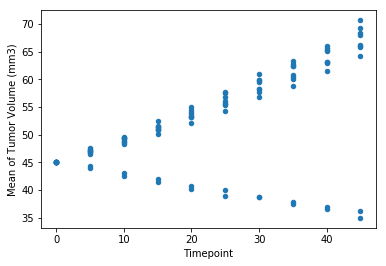

In [99]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Tell matplotlib to create a scatter plot based upon the above data

#data shaped first way:
#labels = mean_sem_merge_df['Drug'].unique().tolist()
#print(labels)
#colors = len(labels)
#print(colors)
#plt.legend(loc='upper left')
#https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
mean_sem_merge_df.plot(kind='scatter', x='Timepoint', y='Mean of Tumor Volume (mm3)' )
plt.show()

#data shaped second way:

#print(pivot_mean_tumor_volume.columns
#for x in pivot_mean_tumor_volume["Drug"]: 
    

# Without scoop_price
#plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")
